# ANÁLISE EXPLORATORIA DOS DADOS CASE HOSPITAIS

In [36]:
# 1. Limpar o Ambiente
import gc
import os

# Limpar variáveis (se necessário)
gc.collect()

34443

In [37]:
# 2. Carregar/Instalar Pacotes
import subprocess
import sys

# Lista de pacotes a serem instalados
packages = [
    "pandas", "numpy", "scipy", "sklearn", "xgboost",
    "matplotlib", "seaborn", "statsmodels", "openpyxl", "xlrd",
    "geopandas", "requests", "tqdm", "geopy"
]

# Função para instalar pacotes
def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Instalar pacotes
for package in packages:
    try:
        __import__(package)
    except ImportError:
        install(package)

# Importar pacotes
import pandas as pd
import numpy as np
import scipy
from sklearn import datasets, linear_model
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import openpyxl
import geopandas as gpd
import requests
import json
from tqdm import tqdm
from scipy.stats import ttest_ind, pearsonr

In [38]:
# 3. Importar Dados

# Defina o caminho para o arquivo
file_path = "C:/Users/super/Downloads/case_hospital/db_aed_case_hospital.xlsx"

# Liste as planilhas disponíveis no arquivo
sheet_names = pd.ExcelFile(file_path).sheet_names

# Importe a planilha desejada (por exemplo, a primeira planilha)
df_alt1 = pd.read_excel(file_path, sheet_name=sheet_names[0])

In [39]:
# 4. Função para Transformar Colunas em Maiúsculas
def transformar_maiusculas(df, coluna):
    # Verificar se a coluna existe no DataFrame
    if coluna not in df.columns:
        raise ValueError("A coluna especificada não existe no DataFrame.")
    
    # Transformar a coluna em maiúsculas
    df[coluna] = df[coluna].str.upper()
    
    return df

# Exemplo de uso da função
#df_alt1 = transformar_maiusculas(df_alt1, 'nome_da_coluna')

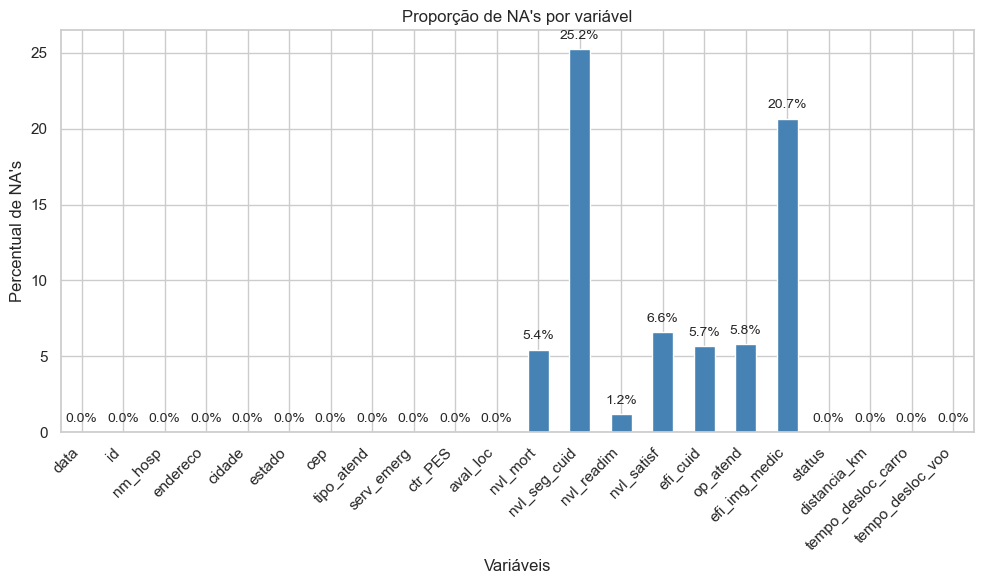

In [40]:
# Análise dos dados ausentes
# Calcular a proporção de NA por variável
prop_missing = df_alt1.isna().mean() * 100
prop_missing = prop_missing.drop('resultado_geral', errors='ignore')

# Criar gráfico de barras para a proporção de NAs
plt.figure(figsize=(10, 6))
prop_missing.plot(kind='bar', color='steelblue')
plt.xlabel('Variáveis')
plt.ylabel('Percentual de NA\'s')
plt.title('Proporção de NA\'s por variável')

# Adicionar rótulos de valores em percentual
for index, value in enumerate(prop_missing):
    plt.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Após calcular a proporção de NA's podemos ter uma investigação mais
afundo sobre. Os valores faltantes se concetram na variaveis sobre
resultados sobre indicadores hospitalares os maiores percentuais de
dados faltantes ficaram com as variaveis de segurança de informaçao
hospitalar com 25,2% dos dados. Seguido pela variavel de indicador de
eficiencia do uso da imagem médica com 20,7%. Ambos com percentuais
relativamente elevados. As demais variaveis com dados faltantes são
todas sobre indicadores hospitalares com valores na faixa de 5 a 6%. A
variavel que demonstrou menor proporção de faltantes foi a variavel do
indicador de readmissão hospitalar com 1,2%, felizmente sendo uma
variavel de suma importancia na avaliacao e com poucas lacunas de
informacoes.

A proporçao de dados faltantes no indicadores é alarmante, o que pode
ocasionar de certa forma uma perda de informacoes que possam ser de
grande valia em outras analises. Porem, optou-se nessa situação alheio
de mais informações de se remover as variaveis NA's dado o carater
qualitativo de como as avaliacoes dos indicadores foi inicialmente
disposto. Se por ventura fossem notas de variaveis numericas continuas
poderiamos preenche-las com a media dos dados, porem nao é o caso.

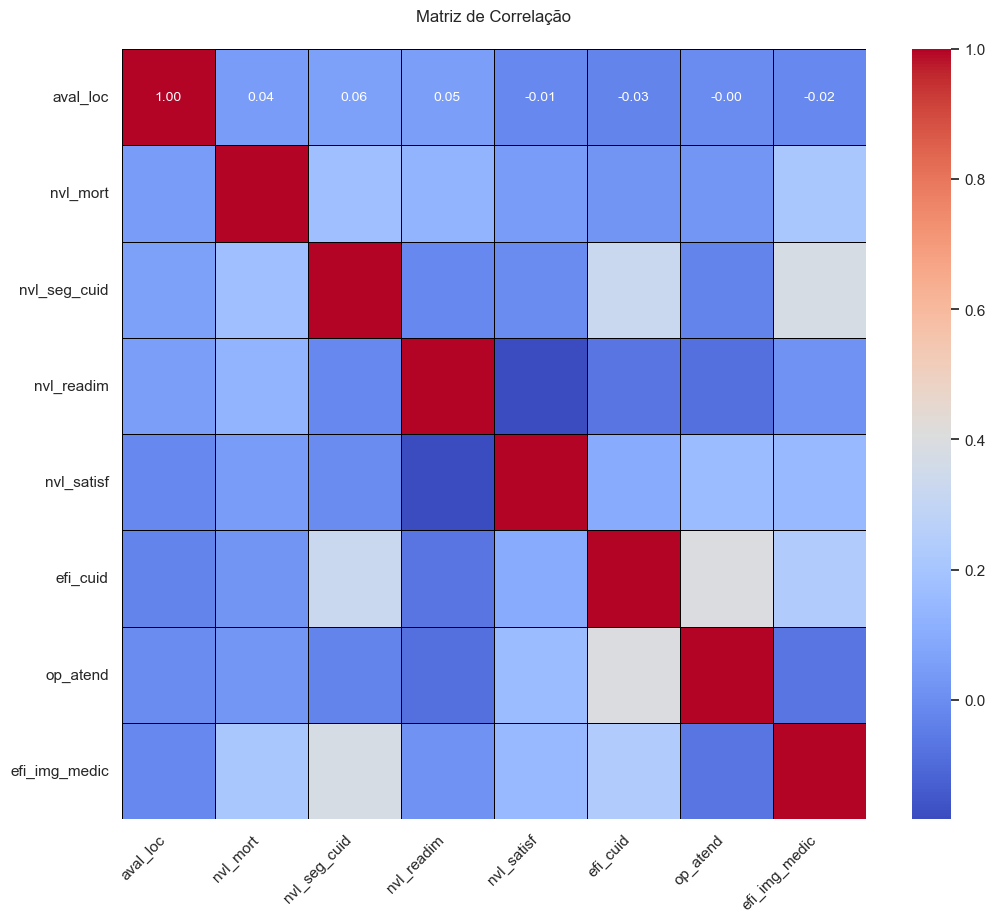

In [41]:
# Análise de correlação
# Filtrar apenas variáveis de interesse, substituindo valores ausentes por 0
selected_columns = df_alt1.loc[:, 'aval_loc':'efi_img_medic'].fillna(0)

# Calcular a matriz de correlação
correlation_matrix = selected_columns.corr()

# Plotar a matriz de correlação
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            cbar=True, annot_kws={"size": 10}, linewidths=.5, linecolor='black')
plt.title('Matriz de Correlação', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

# Resultado da análise de correlação do escores de uso hospitalar e avaliação local geral

## 1. Satisfação dos Pacientes:

A variável nvl_satisf tem uma correlação positiva moderada com op_atend
(0.25), sugerindo que a satisfação dos pacientes está moderadamente
associada à opinião sobre o atendimento recebido. Uma correlação
positiva também existe entre nvl_satisf e efi_cuid (0.11), indicando que
a eficiência dos cuidados também contribui para a satisfação dos
pacientes.

## 2. Readmissão e Satisfação:

nvl_readim tem uma correlação negativa fraca com nvl_satisf (-0.29),
indicando que maiores taxas de readmissão estão associadas ligeramente a
uma pior experiência dos pacientes.

## 3. Avaliação Local e Imagem Médica:

A variável aval_loc tem uma correlação negativa com efi_img_medic
(-0.14), sugerindo que uma avaliação local mais alta pode estar
associada a uma imagem médica menos eficiente. Porém, vemos que a
magnitude da relação é de certa forma fraca.

## 4. Segurança dos Cuidados:

A variável nvl_seg_cuid mostra uma correlação positiva com efi_cuid
(0.06), indicando que uma melhor segurança nos cuidados está associada a
uma maior eficiência nos cuidados, Embora a correlação seja muito fraca.

## 5. Uso Eficiente da Imagem Médica:

op_atend tem uma correlação negativa com efi_img_medic (-0.22),
sugerindo que uma melhor opinião sobre o atendimento pode estar
associada a uma eficiência menor na imagem médica.

## ANALISAR ESSES 3 PONTOS PARA AED

## - Fatores Positivos para Satisfação:

Eficiência dos cuidados e opinião sobre o atendimento são fatores
positivos para a satisfação dos pacientes.

## - Fatores Negativos para Satisfação:

Altas taxas de readmissão e baixa eficiência na imagem médica estão
negativamente associadas à satisfação dos pacientes.

## - Segurança e Eficiência:

Segurança nos cuidados é crucial para a eficiência geral dos cuidados
prestados.

In [42]:
# Análise da correlação entre a avaliação local e o resultado geral
df_alt1['cidade'] = df_alt1['cidade'].str.upper()
df_alt1['estado'] = df_alt1['estado'].str.upper()

# Calcula a média da avaliação local por estado
media_avaliacoes = df_alt1.groupby('estado')['aval_loc'].mean().reset_index()

# Calcula a média do resultado_geral por estado
media_resultado_geral = df_alt1.groupby('estado')['resultado_geral'].mean().reset_index()

# Une as bases
medias = pd.merge(media_avaliacoes, media_resultado_geral, on='estado')

# Reshape os dados para formato longo
medias_melted = medias.melt(id_vars='estado', var_name='metric', value_name='value')

C:\Users\super\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\super\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


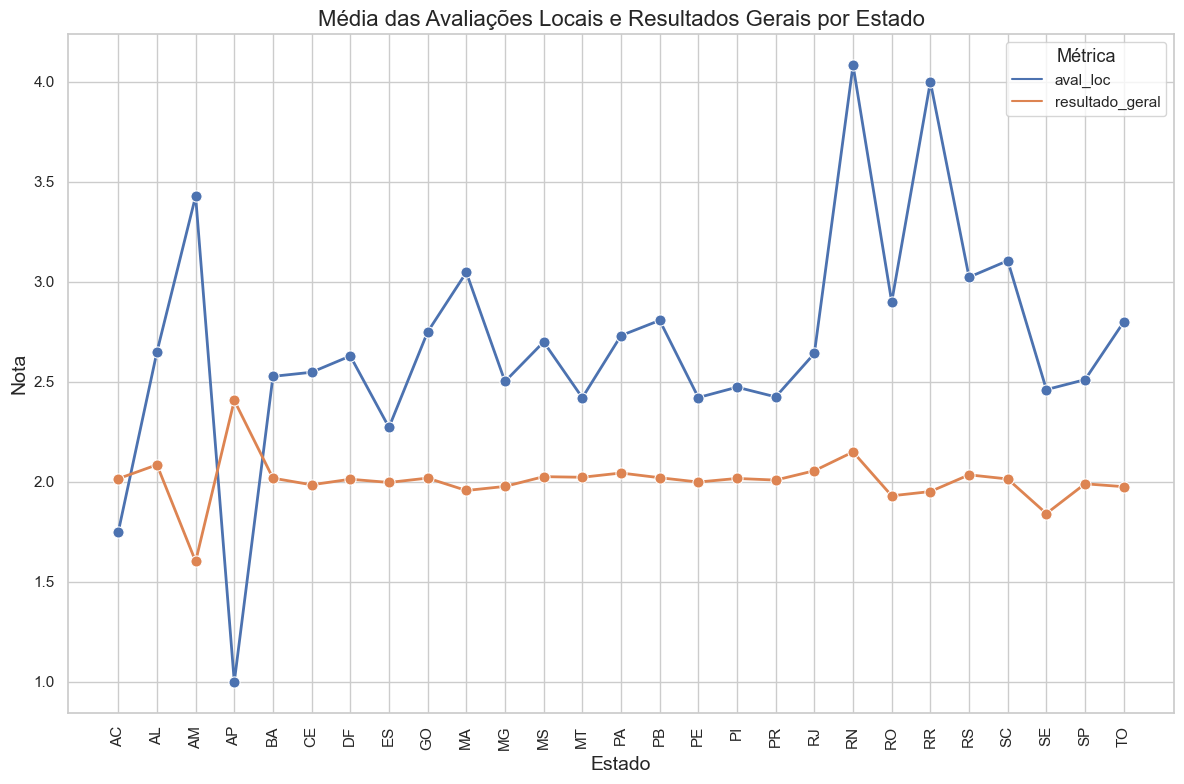

In [43]:
# Gráfico comparativo entre ambas as métricas
plt.figure(figsize=(12, 8))
sns.lineplot(data=medias_melted, x='estado', y='value', hue='metric', marker='o', linewidth=2, markersize=8)

# Configurar os rótulos e o título do gráfico
plt.title('Média das Avaliações Locais e Resultados Gerais por Estado', fontsize=16)
plt.xlabel('Estado', fontsize=14)
plt.ylabel('Nota', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Métrica', title_fontsize='13', fontsize='11')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

No gráfico acima podemos ver que há uma grande variabilidade no
intervalo de 2 a 4 de notas da avaliação local. No caso do
resultado_geral, temos uma constância maior nos valores observados,
demonstrando menor variabilidade dos dados.

In [44]:
# Média da avaliação local por tipo de atendimento
# Calcular a média de aval_loc por tipo_atend
media_aval_loc_por_tipo_atend = df_alt1.groupby('tipo_atend')['aval_loc'].mean().reset_index()
media_aval_loc_por_tipo_atend.columns = ['tipo_atend', 'media_aval_loc']

# Filtrar os dados para os dois grupos específicos
group1 = df_alt1[df_alt1['tipo_atend'] != "hospitais de acesso crítico"]['aval_loc'].dropna()
group2 = df_alt1[df_alt1['tipo_atend'] == "hospitais de acesso crítico"]['aval_loc'].dropna()

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(group1, group2, equal_var=True)

# Ver o resultado
print(f"T-statistic: {t_stat}, p-value: {p_value}")

T-statistic: 2.0157387628534065, p-value: 0.04399172854978625


Brevemente analisando as duas médias para avaliação local, por meio do teste de hipótese t-student
foi possível denotar que partindo das médias de 2,64 para hospitais de cuidados agudos e 2,41 de média para
hospitais de acesso crítico, há diferença estatisticamente significante. Portando a média superior de hospitais de cuidados agudos
pode enfatizar uma relação melhor entre o hospital e seus pacientes, mas necessitaria de análises mais aprofundadas e utilizando
outras variáveis para poder concluir isso com mais exatidão.

Correlacao de Pearson: -0.4415462390004895


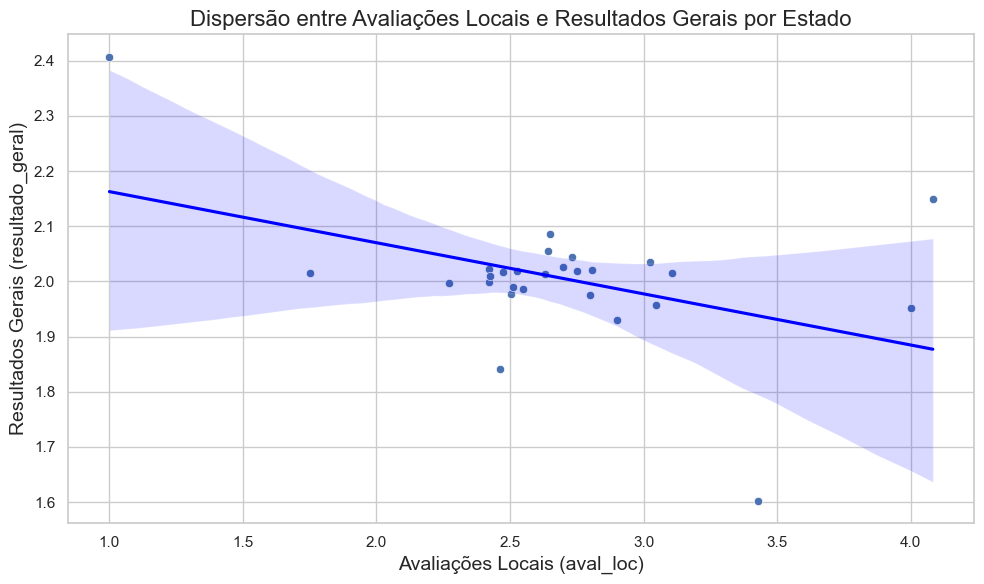

In [45]:
# Dispersão entre ambas as variáveis Avaliação Local e Resultado Geral
# Calcular a correlação de Pearson entre as duas variáveis
correlacao, _ = pearsonr(medias['aval_loc'], medias['resultado_geral'])
print(f'Correlacao de Pearson: {correlacao}')

# Criar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='aval_loc', y='resultado_geral', data=medias)
sns.regplot(x='aval_loc', y='resultado_geral', data=medias, scatter=False, color='blue')

# Configurar os rótulos e o título do gráfico
plt.title('Dispersão entre Avaliações Locais e Resultados Gerais por Estado', fontsize=16)
plt.xlabel('Avaliações Locais (aval_loc)', fontsize=14)
plt.ylabel('Resultados Gerais (resultado_geral)', fontsize=14)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

Com o valor de correlação obtido de -0,44 temos uma indicação de
correlação negativa de grau moderado entre ambas as variáveis. De outro
modo, podemos atribuir uma possível relação de estados com melhores
médias da avaliação local tendem a ter resultados piores na média de
resultados gerais.

Fato esse que corrobora com a hipótese já levantada, de que as
avaliações locais são genéricas e refletem pouco da realidade e
qualidade dos hospitais avaliados. Há uma grande variabilidade entre os
estados, o que demonstra uma possível falta de padronização e critérios
claros de avaliação para a variavel aval_loc. Diferentemente da variável
resultado_geral que utilizou do mesmo critério para todos os hospitais
independente de localidade utilizando como base informações de
instituições de saúde e profissionais da área, trazendo assim mais
consistência na avaliação.

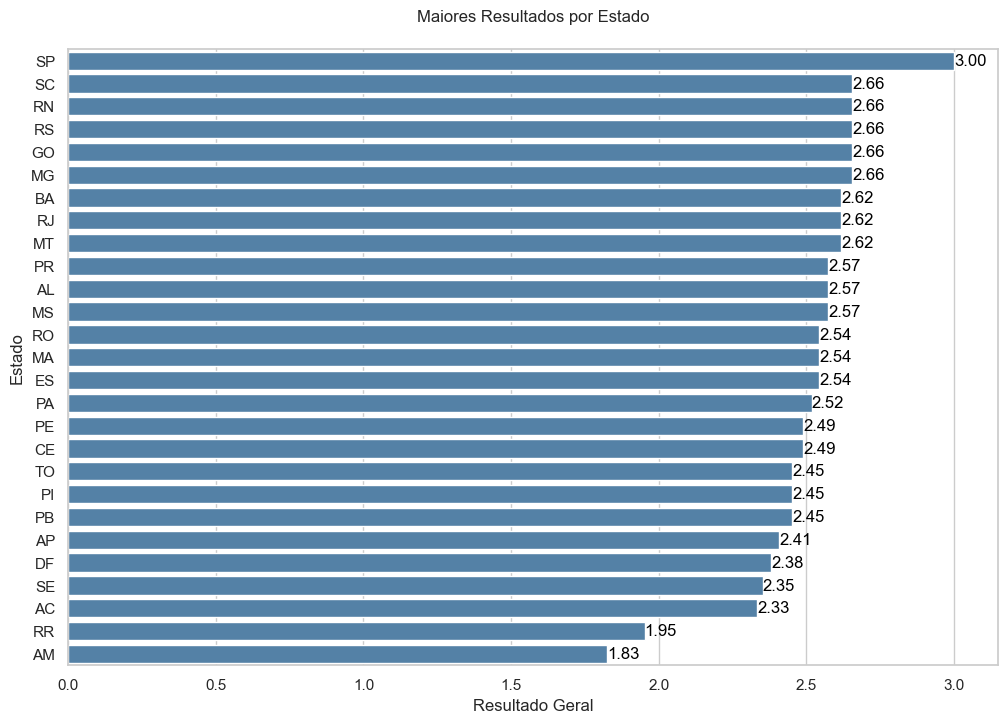

In [46]:
# Maior Resultado Geral dos hospitais por estado
# Agrupa e filtra maior resultado_geral por estado
maiores_resultados = df_alt1.loc[df_alt1.groupby('estado')['resultado_geral'].idxmax()]

# Filtra valores NA em resultado_geral
maiores_resultados = maiores_resultados.dropna(subset=['resultado_geral'])

# Remove duplicados
maiores_resultados = maiores_resultados.drop_duplicates(subset=['estado'])

# Ordenar os dados pelos maiores resultados gerais
maiores_resultados_sorted = maiores_resultados.sort_values(by='resultado_geral', ascending=False)

# Criar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='resultado_geral', y='estado', data=maiores_resultados_sorted, color='steelblue')

# Adicionar rótulos com os valores
for index, value in enumerate(maiores_resultados_sorted['resultado_geral']):
    plt.text(value, index, f'{value:.2f}', color='black', ha='left', va='center')

plt.title('Maiores Resultados por Estado', pad=20)
plt.xlabel('Resultado Geral')
plt.ylabel('Estado')
plt.show()

Nesse gráfico temos o maior resultado individual por hospital para cada
estado. Podemos notar que São Paulo tem o melhor resultado, mas também
temos outros estados com métricas boas, como Góias, Minas Gerais, Rio
Grande do Norte, Rio Grande do SUl, Santa Catarina, Bahia, Mato Grosso e
Alagoas. Creio que com esse apanhado é possível notar futuras
oportunidades de integração com hospitais de qualidade que estejam em
outros estados visando uma maior expansão a nível nacional e também
maior capilaridade dos serviços e alcance da empresa, consequentemente
gerando maior receita e lucro.